In [4]:
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\SERKAN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [5]:
df=pd.read_csv("male_players (1).csv")

In [6]:
# Çıkarmak istediğiniz ligleri belirleyin
anlamsiz_ligler = ["Eliteserien", "Allsvenskan", "SUPERLIGA", "Ligue 2 BKT", "Ö. Bundesliga", "CSSL",	"Scottish Prem", "3F Superliga", "ISL", "SSE Airtricity PD","A-League", "Hellas Liga",
                   "Česká Liga", "Ukrayina Liha", "Liga Hrvatska", "Magyar Liga",	"Liga Cyprus", "Finnliiga",	"United Emirates League","Liga Colombia", "Liga Azerbaijan",
                   "Primera División", "K League 1", "PKO BP Ekstraklasa", "csl league", "CSL", "EFL League One", "EFL League Two", "3. Liga"]  # Örnek lig adları

# Bu ligleri veri setinden çıkarın
df = df[~df['League'].isin(anlamsiz_ligler)]

In [7]:
df1= pd.read_csv("stratified_sample (1) (1).csv")

In [8]:
df2=pd.read_csv("player_market_values (4) (1).csv")

In [9]:
df_filtered = df2[df2["Market Value"] == "-"]
print(df_filtered)

                    name Market Value
6          Alberto Reina            -
24    Fernando Fernández            -
44            Pedro Lima            -
56                 Chuki            -
58             Stoichkov            -
...                  ...          ...
4377         Jimmy Cabot            -
4378         Diego López            -
4399           Elgezabal            -
4400          Ben Wilson            -
4418          Luis Milla            -

[289 rows x 2 columns]


In [10]:
df2 = df2[df2["Market Value"] != "-"]

In [11]:
df2 = df2.rename(columns={'name': 'Name'})

In [12]:
df_final = pd.merge(df1, df2[['Name', 'Market Value']], on='Name', how='left')

In [13]:
silinecek_sutunlar = ['Alternative positions', 'play style']

df_final = df_final.drop(columns=silinecek_sutunlar, errors='ignore')

In [14]:
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
df_final[gk_columns] = df_final[gk_columns].fillna(0)

In [15]:
import re

In [16]:
df_final['Weight'] = df_final['Weight'].str.split(' ').str[0]
pattern = re.compile(r'\D+')
df_final['Weight'] = [int(pattern.sub('', weight)) for weight in df_final['Weight']]

In [17]:
df_final['Height'] = df_final['Height'].str.split(' ').str[0]
df_final['Height'] = [int(pattern.sub('', height)) for height in df_final['Height']]

In [18]:
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

# Kaleci sütunlarını int'e dönüştür
for col in gk_columns:
    df_final[col] = df_final[col].astype(int)

In [19]:
df_final["new_values"] = df_final["Market Value"].astype(str).str[1:]  # Stringe çevir ve ilk karakteri kaldır

new_values = []
for value in df_final["new_values"]:
    if isinstance(value, float) or value in ["", "nan"]:  # Eğer değer float (NaN olabilir) veya boşsa
        new_values.append(0)  # Boş veya hatalı değeri 0 yap
    else:
        value = value.strip()  # Boşlukları temizle
        if "ot Found" in value:  # "Not Found" gibi hatalı metinleri kontrol et
            new_values.append(0)
        elif "M" in value.upper():  # Milyon değeri için çeviri
            new_values.append(float(value.replace("M", "").replace("m", "")) * 1_000_000)
        elif "K" in value.upper():  # Binlik değeri için çeviri
            new_values.append(float(value.replace("K", "").replace("k", "")) * 1_000)
        else:
            try:
                new_values.append(float(value))  # Sayısal değeri dönüştür
            except ValueError:
                new_values.append(0)  # Dönüştürülemezse, 0 ekle

# Yeni sütunu DataFrame'e ekle
df_final["New_Market_Value"] = new_values
df_final.head()


,Unnamed: 0.1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Team,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Market Value,new_values,New_Market_Value
0,5226,5226,5902,Mayckel Lahdo,69,80,64,59,74,27,...,AZ,https://www.ea.com/games/ea-sports-fc/ratings/...,0,0,0,0,0,€3.00m,3.00m,3000000.0
1,3173,3173,3521,Diego Rubio,72,68,72,65,71,48,...,Austin FC,https://www.ea.com/games/ea-sports-fc/ratings/...,0,0,0,0,0,€1.00m,1.00m,1000000.0
2,10035,10035,11203,Matthieu Epolo,64,66,65,59,66,32,...,Standard Liège,https://www.ea.com/games/ea-sports-fc/ratings/...,66,65,59,59,66,€3.00m,3.00m,3000000.0
3,16017,16017,17535,Jovan Mijatovic,50,54,51,41,51,23,...,New York City FC,https://www.ea.com/games/ea-sports-fc/ratings/...,0,0,0,0,0,€4.50m,4.50m,4500000.0
4,6272,6272,6884,Julian Niehues,68,59,54,59,64,67,...,Heidenheim,https://www.ea.com/games/ea-sports-fc/ratings/...,0,0,0,0,0,€1.50m,1.50m,1500000.0


In [20]:
df_final = df_final[df_final["New_Market_Value"] != 0]

In [21]:
zero_market_value = df_final[df_final['New_Market_Value'] == 0]

print(zero_market_value)

Empty DataFrame
Columns: [Unnamed: 0.1, Unnamed: 0, Rank, Name, OVR, PAC, SHO, PAS, DRI, DEF, PHY, Acceleration, Sprint Speed, Positioning, Finishing, Shot Power, Long Shots, Volleys, Penalties, Vision, Crossing, Free Kick Accuracy, Short Passing, Long Passing, Curve, Dribbling, Agility, Balance, Reactions, Ball Control, Composure, Interceptions, Heading Accuracy, Def Awareness, Standing Tackle, Sliding Tackle, Jumping, Stamina, Strength, Aggression, Position, Weak foot, Skill moves, Preferred foot, Height, Weight, Age, Nation, League, Team, url, GK Diving, GK Handling, GK Kicking, GK Positioning, GK Reflexes, Market Value, new_values, New_Market_Value]
Index: []

[0 rows x 59 columns]


In [22]:
df_final["New_Market_Value"] = df_final["New_Market_Value"].astype(int)

In [23]:
names_to_remove = ["Martin", "Felipe", "Alan", "Jader", "Mateus", "Félix", "Matheus Pereira", "Bernardo","Martín"]
df_final = df_final[~df_final["Name"].isin(names_to_remove)]

In [24]:
df_final = df_final.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Rank", "Preferred foot"], errors='ignore')

In [25]:
df_final['gk_features'] = df_final[['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']].sum(axis=1)

In [26]:
df_final.drop(['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [27]:
df_final['Age_Group'] = pd.cut(df_final['Age'], bins=[0, 20, 30, 40], labels=['Teen', 'Young Adult', 'Adult'])
df_final['OVR_PAC'] = df_final['OVR'] * df_final['PAC']


In [28]:
numeric_df = df_final.select_dtypes(include=['number'])
numeric_df.corr()


,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Strength,Aggression,Weak foot,Skill moves,Height,Weight,Age,New_Market_Value,gk_features,OVR_PAC
OVR,1.000000,0.253018,0.432496,0.684588,0.668755,0.331309,0.571830,0.188633,0.199141,0.303979,...,0.355694,0.366823,0.219317,0.288942,0.042181,0.103756,0.384594,0.517014,-0.003194,0.654091
PAC,0.253018,1.000000,0.334264,0.259613,0.512058,-0.247805,-0.077860,0.691004,0.708628,0.291327,...,-0.199100,-0.128861,0.119678,0.314679,-0.311874,-0.268989,-0.146886,0.232925,0.002494,0.893958
SHO,0.432496,0.334264,1.000000,0.655523,0.759612,-0.454192,0.022862,0.102457,0.036767,0.367551,...,-0.104340,-0.245264,0.213905,0.303241,-0.095417,-0.031310,0.235667,0.212788,0.266204,0.461280
PAS,0.684588,0.259613,0.655523,1.000000,0.830698,0.126052,0.183542,0.120088,0.040921,0.307187,...,-0.067651,0.063565,0.215639,0.307022,-0.180824,-0.130792,0.313001,0.322730,0.183626,0.514594
DRI,0.668755,0.512058,0.759612,0.830698,1.000000,-0.136695,0.068169,0.316303,0.228654,0.415745,...,-0.157972,-0.047008,0.245469,0.417003,-0.263351,-0.201468,0.176462,0.366971,0.150968,0.702877
DEF,0.331309,-0.247805,-0.454192,0.126052,-0.136695,1.000000,0.478649,0.053336,0.083811,0.022198,...,0.365148,0.687573,-0.016540,-0.029282,0.035209,0.031957,0.190062,0.102214,-0.309758,-0.048066
PHY,0.571830,-0.077860,0.022862,0.183542,0.068169,0.478649,1.000000,-0.133806,-0.037021,-0.043481,...,0.847431,0.519240,0.041931,-0.150086,0.449187,0.504319,0.393793,0.204783,0.059180,0.200721
Acceleration,0.188633,0.691004,0.102457,0.120088,0.316303,0.053336,-0.133806,1.000000,0.903117,0.716612,...,-0.106986,0.328080,0.231133,0.671790,-0.535513,-0.471820,-0.176410,0.195463,-0.643908,0.616584
Sprint Speed,0.199141,0.708628,0.036767,0.040921,0.228654,0.083811,-0.037021,0.903117,1.000000,0.668478,...,0.019177,0.360223,0.207631,0.598807,-0.405339,-0.359577,-0.170185,0.213311,-0.643258,0.635261
Positioning,0.303979,0.291327,0.367551,0.307187,0.415745,0.022198,-0.043481,0.716612,0.668478,1.000000,...,0.019631,0.455670,0.307812,0.785749,-0.457006,-0.387880,0.010741,0.209603,-0.739549,0.357349


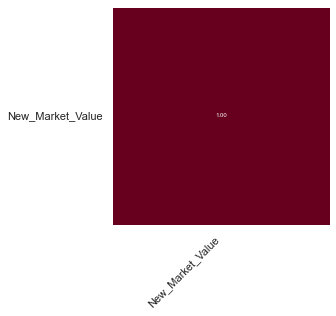

[]

In [29]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in [int, float]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        sns.set(rc={'figure.figsize': (16, 16)})  # Daha geniş bir figure boyutu
        heatmap = sns.heatmap(corr, cmap='RdBu', cbar=False, annot=True, fmt=".2f", linewidths=.5, annot_kws={"size": 6}, square=True)
        plt.xticks(rotation=45, ha='right')  # X ekseni etiketlerini döndür ve hizala
        plt.yticks(rotation=0)  # Y ekseni etiketlerini döndürme

        # Görseli kaydetme
        plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')  # Dosya adı, çözünürlük ve kenar boşlukları ayarlandı

        plt.show()

    return drop_list

# Fonksiyonu çağırın ve plot=True parametresini kullanın
high_correlated_cols(df_final, plot=True)


In [30]:
# Calculate high_corr_cols
high_corr_cols = high_correlated_cols(df_final, plot=False)

# Bu sütunları DataFrame'den çıkaralım
df_final = df_final.drop(columns=high_corr_cols)  # Now high_corr_cols is defined


In [31]:
# Pozisyonları genel kategorilere ayırma fonksiyonu
def categorize_position(position):
    if position == 'GK':  # Kaleci
        return 'Goalkeeper'
    elif position in ['CB', 'LB', 'RB']:  # Defans
        return 'Defender'
    elif position in ['CM', 'CDM', 'LM', 'RM', 'CAM']:  # Orta saha
        return 'Midfielder'
    elif position in ['ST', 'LW', 'RW']:  # Hücum
        return 'Attacker'
    else:
        return 'Unknown'

# Yeni kategorik sütunu oluştur
df_final['Position_Category'] = df_final['Position'].apply(categorize_position)

# 'Position' sütununu kaldır
df_final = df_final.drop('Position', axis=1)

In [32]:
# Avrupa ülkelerinin listesi
european_countries = [
    "Spain", "Germany", "England", "Italy", "France", "Holland", "Belgium", "Portugal",
    "Turkey", "Poland", "Croatia", "Wales", "Scotland", "Sweden", "Côte d'Ivoire",
    "Norway", "Austria", "Serbia", "Switzerland", "Denmark", "Bosnia and Herzegovina",
    "Czech Republic", "Albania", "Slovenia", "Iceland", "Romania", "Slovakia",
    "Finland", "Northern Ireland", "Hungary", "Ukraine", "Kosovo", "Greece",
    "Russia", "Luxembourg", "North Macedonia", "Bulgaria", "Montenegro", "Estonia",
    "Armenia", "Lithuania", "Cyprus", "Georgia", "Azerbaijan", "Malta", "Andorra"
]

# Yeni bir sütun ekleyerek ülkeyi sınıflandır
df_final["Region"] = df_final["Nation"].apply(lambda x: "Europe" if x in european_countries else "Non-Europe")



In [33]:
df_final = df_final.drop(columns=["url", "Team", "Nation", "Market Value", "new_values"], errors='ignore')

In [34]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    """
           Bu fonksiyon veri setindeki kategorik, numeric ve kategorik fakat kardinal değişkenlerin isimlerini verir.
           Not: Kategorik değikenlere numerik görünümlü ketagorik değişkenlerde dahildir.

           Args:
               dataframe: dataframe
                   değişken isimleri alınmak istenen dataframe'dir,
               cat_th: int, float
                   numerik fakat kategorik olan değişkenler için sınıf eşik değeri.
               car_th: int, float
                   kategorik fakat kardinal değişkenler için sınıf eşik değeri.

           Returns:
               cat_cols: list
                   kategorik değişken listesi
               num_cols: list
                   numerik değişken listesi
               cat_but_car: list
                   kategorik görünümlü kardinal değişken listesi

           Notes:
               cat_cols + num_cols + cat_but_car = toplam değişken sayısı
               num_but_cat cat_cols'un içinde yer alıyor.

           """


    # kategorik değişken analizi

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Numerik değişken analizi

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df_final)

cat_cols
num_cols
cat_but_car


Observations: 3973
Variables: 49
cat_cols: 6
num_cols: 42
cat_but_car: 1
num_but_cat: 3


['Name']

In [35]:
df_final_1 = df_final.copy()

In [36]:
# One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df_final_1 = one_hot_encoder(df_final_1, cat_cols, drop_first=True)

In [37]:
bool_cols = df_final_1.select_dtypes(include=['bool']).columns
df_final_1[bool_cols] = df_final_1[bool_cols].astype(int)

In [38]:
y = df_final_1['New_Market_Value']
X = df_final_1.drop(["Name", "New_Market_Value"], axis=1)

In [39]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

c:\Users\SERKAN\anaconda3\lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [40]:
import sklearn  # sklearn kütüphanesini import et
print("Scikit-learn sürümü:", sklearn.__version__)

Scikit-learn sürümü: 1.5.2


In [41]:
# Verinin eğitim ve test verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17)

In [42]:
# Linear Regression
from sklearn.linear_model import LinearRegression

def linear_regression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [43]:
# Ridge Regression
from sklearn.linear_model import Ridge

def ridge_regression():
    model = Ridge()
    model.fit(X_train, y_train)
    return model

In [44]:
# lasso_regression
from sklearn.linear_model import Lasso

def lasso_regression():
    model = Lasso()
    model.fit(X_train, y_train)
    return model

In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

def decision_tree():
    model = DecisionTreeRegressor(random_state=12345)
    model.fit(X_train, y_train)
    return model

In [46]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

def random_forest():
    model = RandomForestRegressor(n_estimators=100, random_state=12345)
    model.fit(X_train, y_train)
    return model

In [47]:
# XGBoost
from xgboost import XGBRegressor

def xgboost():
    model = XGBRegressor(random_state=12345)
    model.fit(X_train, y_train)
    return model

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation Function
def evaluate_models(models, X_test, y_test):

    results = []

    for name, model in models.items():
        if name == "Deep Neural Network":
            y_pred = model.predict(X_test).flatten()
        else:
            y_pred = model.predict(X_test)

        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Append results
        results.append({
            "Model": name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R² Score": r2
        })


    # Convert results to DataFrame
    return pd.DataFrame(results)

In [49]:
models = {
    "Linear Regression": linear_regression(),
    "Ridge Regression": ridge_regression(),
    "Lasso Regression": lasso_regression(),
    "Decision Tree": decision_tree(),
    "Random Forest": random_forest(),
    "XGBoost": xgboost()
}

# Evaluate all models
evaluation_results = evaluate_models(models, X_test, y_test)

# Display results in tabular form
evaluation_results

c:\Users\SERKAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+17, tolerance: 4.748e+13
  model = cd_fast.enet_coordinate_descent(


,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,4.181777e+06,4.590410e+13,6.775256e+06,0.589895
1,Ridge Regression,4.173368e+06,4.569952e+13,6.760142e+06,0.591722
2,Lasso Regression,4.179856e+06,4.590122e+13,6.775044e+06,0.589920
3,Decision Tree,2.883247e+06,4.023510e+13,6.343114e+06,0.640541
4,Random Forest,1.990286e+06,1.500057e+13,3.873057e+06,0.865985
5,XGBoost,2.325021e+06,2.130007e+13,4.615200e+06,0.809706


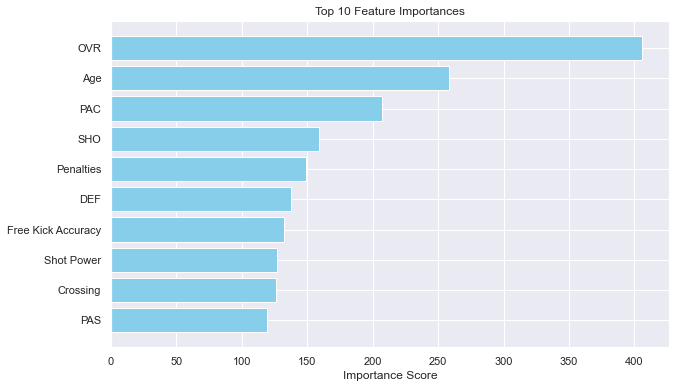

               Feature  Importance
0                  OVR       406.0
27                 Age       258.0
1                  PAC       207.0
2                  SHO       159.0
10           Penalties       149.0
5                  DEF       138.0
13  Free Kick Accuracy       132.0
9           Shot Power       127.0
12            Crossing       126.0
3                  PAS       119.0


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Model eğitimi
model = XGBRegressor(random_state=12345)
model.fit(X_train, y_train)

# Özellik önem skorlarını alma
feature_importances = model.get_booster().get_score(importance_type='weight')

# Skorları DataFrame'e dönüştürme
importance_df = pd.DataFrame(
    feature_importances.items(),
    columns=['Feature', 'Importance']
).sort_values(by='Importance', ascending=False)

# En önemli 10 özelliği seçme
top_features = importance_df.head(10)

# Özellik önemlerini plotlama
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Özellikleri yukarıdan aşağıya sıralamak için
plt.show()

# Özellik önem skorlarını yazdırma
print(top_features)


In [42]:
xgboost_model = XGBRegressor()

# RMSE değerini hesaplayın
rmse = np.mean(np.sqrt(-cross_val_score(xgboost_model, X, y, cv=5, scoring="neg_mean_squared_error")))
print(f"XGBoost Model RMSE: {round(rmse, 4)}")

XGBoost Model RMSE: 6048977.3754


In [43]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth
    'learning_rate': [0.01, 0.1, 0.2],  # Öğrenme oranı
    'subsample': [0.8, 1.0],         # Learning rate
    'colsample_bytree': [0.8, 1.0],  # Column sampling rate by tree
    'gamma': [0, 1, 5]               # Minimum loss reduction
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='r2', cv=5, verbose=1)

# Apply Grid search to education data
grid_search.fit(X_train, y_train)

# Access the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print("Best Model Score (R2):", best_model_score)

# Predict with the best model
predictions = best_model.predict(X_test)
print("Predictions:", predictions)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\SERKAN\anaconda3\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model Score (R2): 0.8919655084609985
Predictions: [ 1.36632475e+06  4.74846950e+06  2.12744825e+06  8.80856875e+05
  5.27125250e+05  5.30164750e+05  9.15020600e+06  1.75914350e+06
  1.32800690e+07  1.96726762e+06  1.32308888e+06  1.69250000e+06
  6.39581750e+06  2.09715300e+06  4.17156450e+06  1.47564525e+06
  1.99267825e+06  4.19308350e+06  4.39868320e+07  1.47793130e+07
  3.87619094e+05  8.07559812e+05  7.94675500e+05  2.01153838e+06
  1.23201938e+06  1.25172275e+06 -2.71329656e+05  4.32657469e+05
  1.90409812e+06  8.15064562e+05  7.45193400e+06  3.99007920e+07
  3.05037175e+06  1.65004120e+07 -9.30411875e+05  2.46470825e+06
  1.68545880e+07  8.05211150e+06  1.40479536e+08  6.93246375e+05
  1.17199080e+07  3.61135500e+05  6.06144125e+05  1.16207070e+07
  3.99392531e+05  1.07341238e+06  1.93079800e+06  7.14047950e+06
  4.95992031e+05  2.43661975e+06  3.21342200e+06  9.35180200e+06
 -9.22375500e+05  5.29973438e+04  2.22739400e+06  2.98263925e+06
  5.77465750e+05 -5.12885062e+05  1

In [44]:
import joblib

# En iyi modeli joblib ile kaydet
joblib.dump(best_model, 'best_xgboost_modelvsc89.joblib')

['best_xgboost_modelvsc89.joblib']

In [45]:
import pickle

# En iyi modeli pickle ile kaydet
with open('best_xgboost_modelvsc89.pkl', 'wb') as f:
    pickle.dump(best_model, f)